<a href="https://colab.research.google.com/github/Razia-Amy/Lung_Cancer_Prediction_Machine_Learning/blob/main/Lung_Cancer_Prediction_Using_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving LungCancerSurvey.csv to LungCancerSurvey.csv


In [4]:
data = pd.read_csv('LungCancerSurvey.csv')

In [5]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (509, 18)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,FINGER_CLUBBING,ANXIETY,WORKING_AT_CARCINOGEN,CHRONIC DISEASE,FATIGUE,ALLERGY,UNEXPECTED_WEIGHT_LOSS,LOSS_OF_APPETITE,COUGHING,SHORTNESS OF BREATH,FAMILY MEMBER HAD CANCER,SWALLOWING DIFFICULTY,BRONCHITIS OR PNEUMONIA,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,1,2,1,2,2,2,2,1,2,1,2,Positive
1,M,74,2,1,1,1,2,2,2,2,2,1,2,1,2,1,2,Positive
2,F,59,1,1,1,1,1,2,1,2,2,2,2,2,1,2,2,Negative
3,M,63,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,Negative
4,F,63,1,2,1,2,1,1,1,2,2,2,2,1,1,1,1,Negative


In [6]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENDER                    509 non-null    object
 1   AGE                       509 non-null    int64 
 2   SMOKING                   509 non-null    int64 
 3   FINGER_CLUBBING           509 non-null    int64 
 4   ANXIETY                   509 non-null    int64 
 5   WORKING_AT_CARCINOGEN     509 non-null    int64 
 6   CHRONIC DISEASE           509 non-null    int64 
 7   FATIGUE                   509 non-null    int64 
 8   ALLERGY                   509 non-null    int64 
 9   UNEXPECTED_WEIGHT_LOSS    509 non-null    int64 
 10  LOSS_OF_APPETITE          509 non-null    int64 
 11  COUGHING                  509 non-null    int64 
 12  SHORTNESS OF BREATH       509 non-null    int64 
 13  FAMILY MEMBER HAD CANCER  509 non-null    int6

In [7]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
AGE,509.000000,62.675835,8.840618,21.000000,57.000000,62.000000,69.000000,87.000000
SMOKING,509.000000,1.599214,0.490540,1.000000,1.000000,2.000000,2.000000,2.000000
FINGER_CLUBBING,509.000000,1.500982,0.500491,1.000000,1.000000,2.000000,2.000000,2.000000
ANXIETY,509.000000,1.540275,0.498866,1.000000,1.000000,2.000000,2.000000,2.000000
WORKING_AT_CARCINOGEN,509.000000,1.392927,0.488881,1.000000,1.000000,1.000000,2.000000,2.000000
CHRONIC DISEASE,509.000000,1.540275,0.498866,1.000000,1.000000,2.000000,2.000000,2.000000
FATIGUE,509.000000,1.713163,0.452730,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,509.000000,1.550098,0.497973,1.000000,1.000000,2.000000,2.000000,2.000000
UNEXPECTED_WEIGHT_LOSS,509.000000,1.909627,0.286998,1.000000,2.000000,2.000000,2.000000,2.000000
LOSS_OF_APPETITE,509.000000,1.897839,0.303158,1.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,509,2,M,313
LUNG_CANCER,509,2,Positive,393


In [9]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,FINGER_CLUBBING,ANXIETY,WORKING_AT_CARCINOGEN,CHRONIC DISEASE,FATIGUE,ALLERGY,UNEXPECTED_WEIGHT_LOSS,LOSS_OF_APPETITE,COUGHING,SHORTNESS OF BREATH,FAMILY MEMBER HAD CANCER,SWALLOWING DIFFICULTY,BRONCHITIS OR PNEUMONIA,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 2 duplicate entries among 509 entries in this dataset.

After removing duplicate entries there are 507 entries in this dataset.


In [11]:
df = data.copy()
df["GENDER"] = df["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in df.columns:
    df[column] = df[column].replace({2: "Yes" , 1 : "No", "Positive" : "YES", "Negative" : "NO"})

df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"}) 

,GENDER,AGE,SMOKING,FINGER_CLUBBING,ANXIETY,WORKING_AT_CARCINOGEN,CHRONIC DISEASE,FATIGUE,ALLERGY,UNEXPECTED_WEIGHT_LOSS,LOSS_OF_APPETITE,COUGHING,SHORTNESS OF BREATH,FAMILY MEMBER HAD CANCER,SWALLOWING DIFFICULTY,BRONCHITIS OR PNEUMONIA,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,YES
2,Female,59,No,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,NO
4,Female,63,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,NO


In [12]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

In [13]:
data_pos = df[df["LUNG_CANCER"] == "YES"]
data_pos.head(454).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,FINGER_CLUBBING,ANXIETY,WORKING_AT_CARCINOGEN,CHRONIC DISEASE,FATIGUE,ALLERGY,UNEXPECTED_WEIGHT_LOSS,LOSS_OF_APPETITE,COUGHING,SHORTNESS OF BREATH,FAMILY MEMBER HAD CANCER,SWALLOWING DIFFICULTY,BRONCHITIS OR PNEUMONIA,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,YES
9,Male,53,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,YES
10,Female,61,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,YES
11,Male,72,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,YES
13,Male,58,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,YES
15,Female,48,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,YES


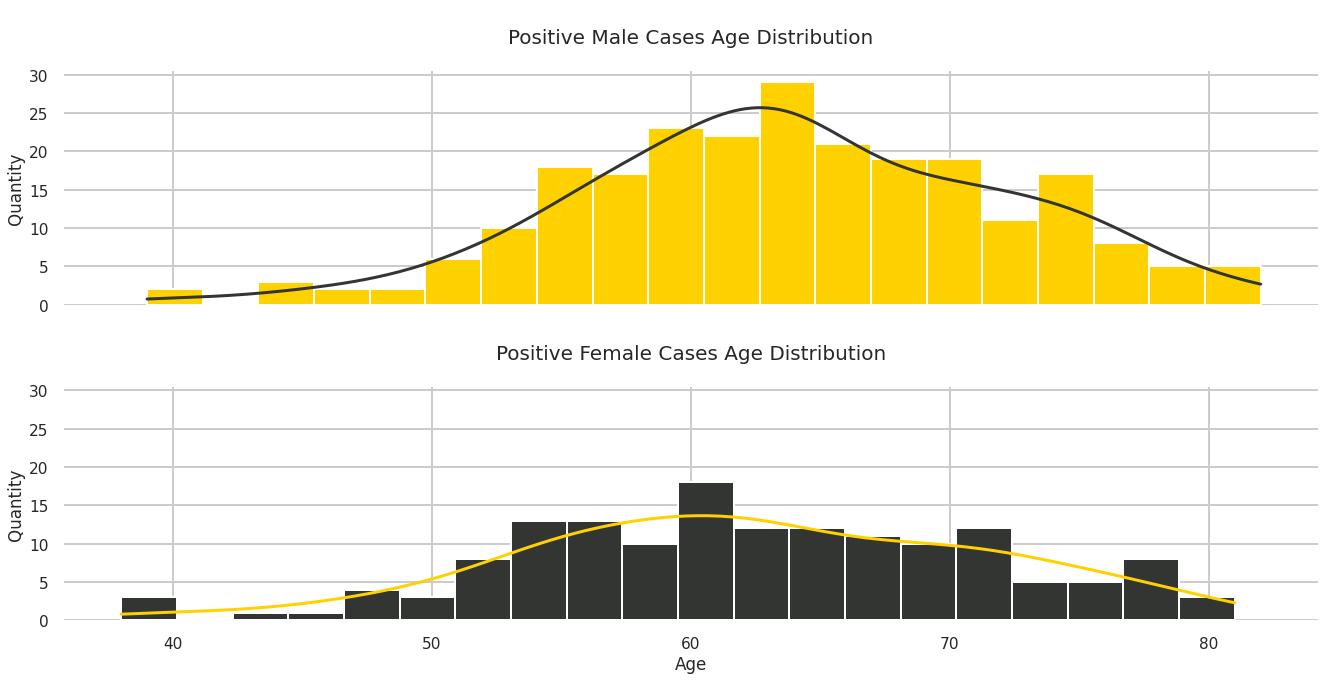

In [14]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_pos[data_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_pos[data_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

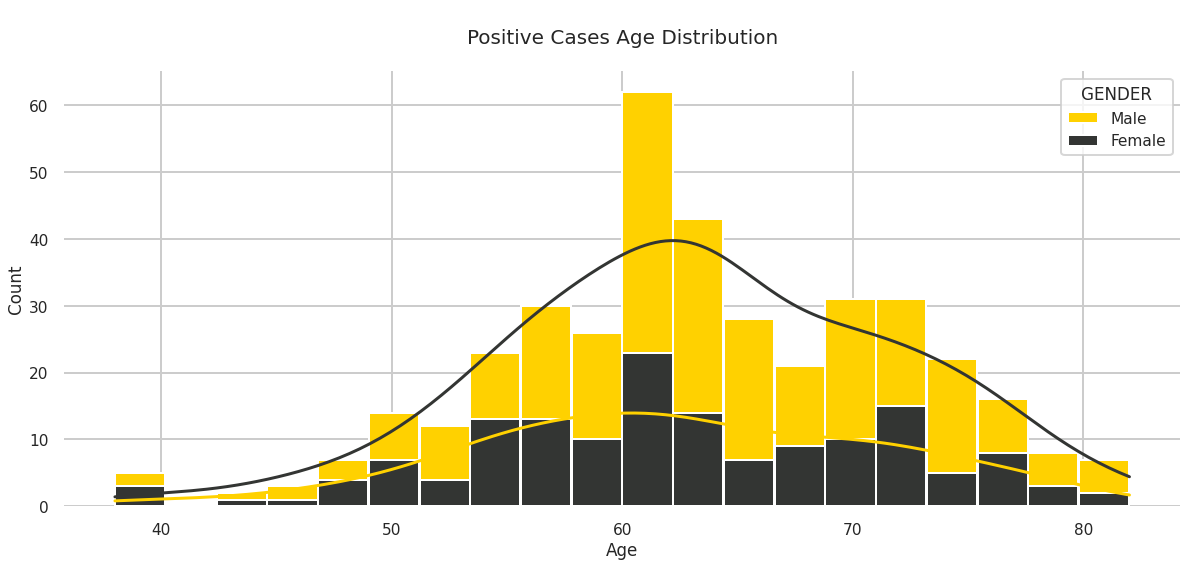

In [15]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

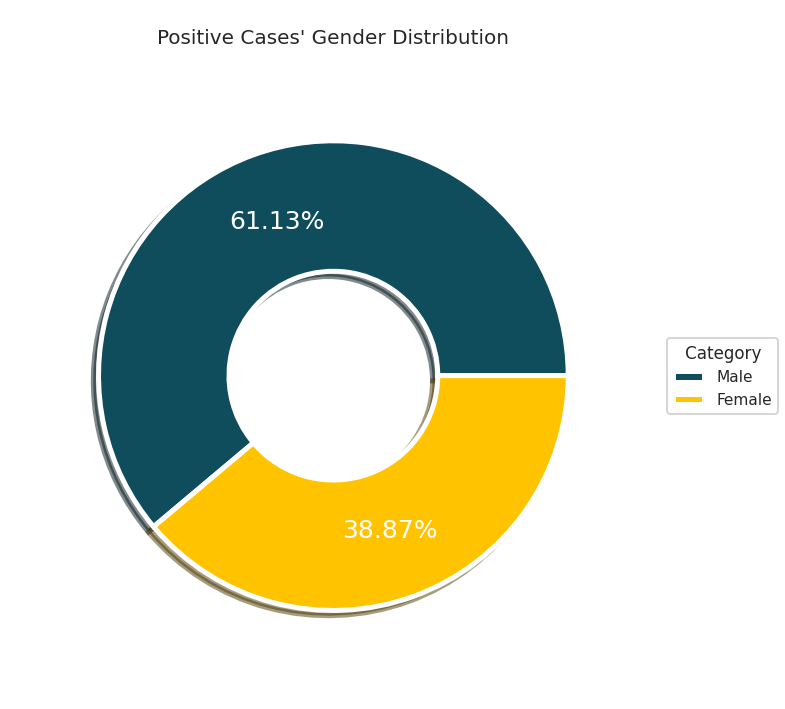

In [16]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_pos[data_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_pos[data_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

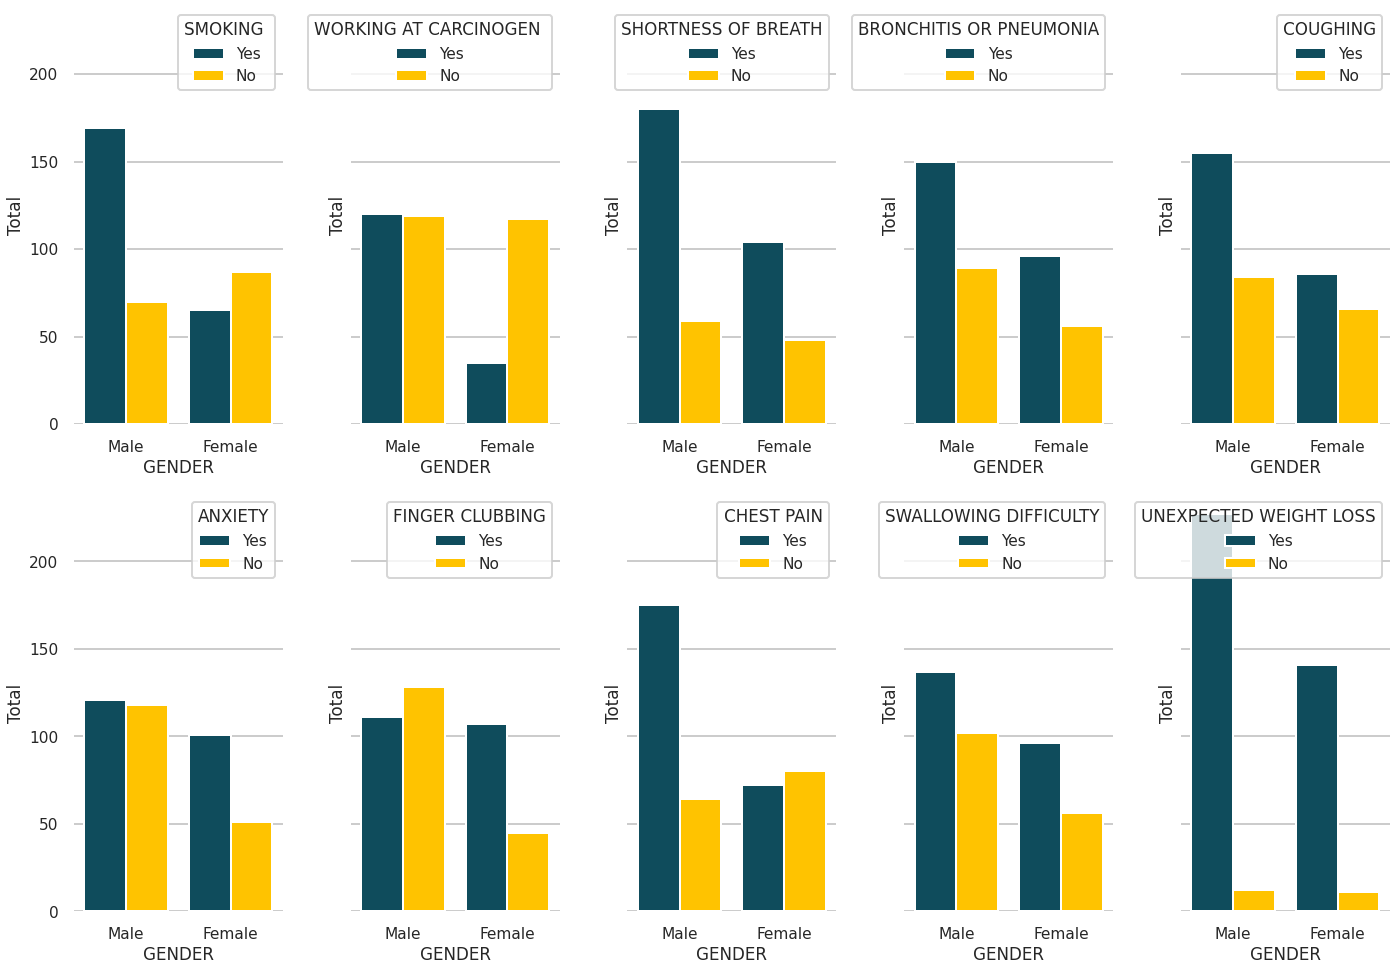

In [19]:

_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=2.0)

sns.countplot(data=data_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="SMOKING ",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="WORKING_AT_CARCINOGEN",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="WORKING AT CARCINOGEN ",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="SHORTNESS OF BREATH",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="BRONCHITIS OR PNEUMONIA",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="BRONCHITIS OR PNEUMONIA",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="COUGHING",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="ANXIETY",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="FINGER_CLUBBING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="FINGER CLUBBING",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="CHEST PAIN",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="SWALLOWING DIFFICULTY",loc="upper right")

sns.countplot(data=data_pos,x="GENDER",hue="UNEXPECTED_WEIGHT_LOSS",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="UNEXPECTED WEIGHT LOSS",loc="upper right")

sns.despine(left=True, bottom=True)
plt.show()
     


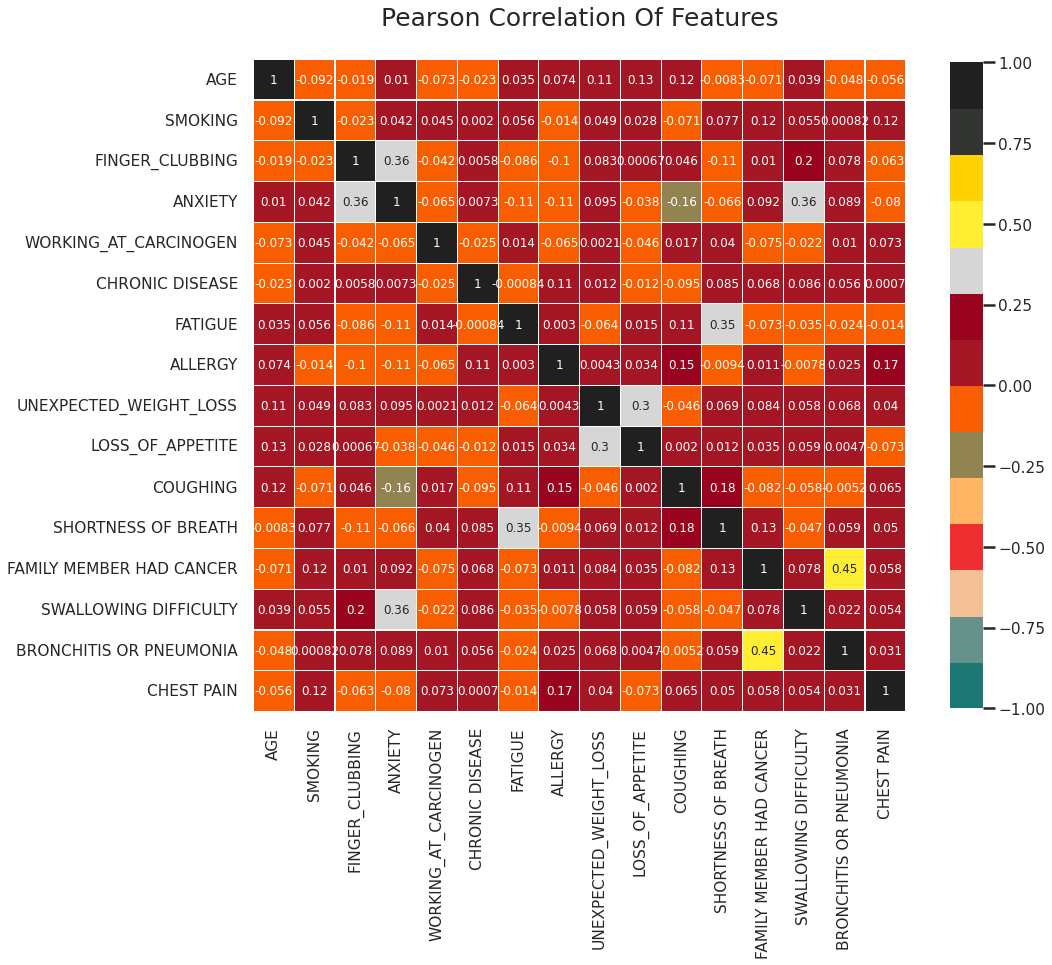

In [20]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [24]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data.rename(columns={"LUNG_CANCER" : "LUNG CANCER" }, inplace=True)
x = data.drop("LUNG CANCER", axis = 1)
y = data['LUNG CANCER']

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (405, 18), (405,)
Shape of testing data : (102, 18), (102,)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtcla = DecisionTreeClassifier(random_state=9)
dtcla.fit(x_train, y_train)
dtcla_pred = dtcla.predict(x_test)
dtcla_conf = confusion_matrix(y_test, dtcla_pred)
dtcla_report = classification_report(y_test, dtcla_pred)
dtcla_acc = round(accuracy_score(y_test, dtcla_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{dtcla_conf}")
print(f"\nClassification Report : \n\n{dtcla_report}")
print(f"\nThe Accuracy of Decision Tree Classification is {dtcla_acc} %")

Confusion Matrix : 

[[13 13]
 [10 66]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.84      0.87      0.85        76

    accuracy                           0.77       102
   macro avg       0.70      0.68      0.69       102
weighted avg       0.77      0.77      0.77       102


The Accuracy of Decision Tree Classification is 77.45 %


              precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.84      0.87      0.85        76

    accuracy                           0.77       102
   macro avg       0.70      0.68      0.69       102
weighted avg       0.77      0.77      0.77       102



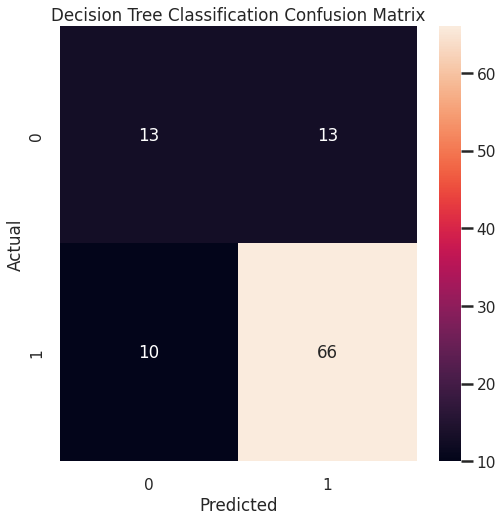

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=9)
dtcla.fit(x_train, y_train)
dtcla_pred = dtcla.predict(x_test)
dtcla_cm = confusion_matrix(y_test, dtcla_pred)
confusion_dtcla=confusion_matrix(y_test,dtcla.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_dtcla,annot=True)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,dtcla_pred))
     

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 9 17]
 [ 4 72]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.35      0.46        26
           1       0.81      0.95      0.87        76

    accuracy                           0.79       102
   macro avg       0.75      0.65      0.67       102
weighted avg       0.78      0.79      0.77       102


The Accuracy of Logistic Regression is 79.41 %


              precision    recall  f1-score   support

           0       0.70      0.27      0.39        26
           1       0.79      0.96      0.87        76

    accuracy                           0.78       102
   macro avg       0.75      0.61      0.63       102
weighted avg       0.77      0.78      0.75       102



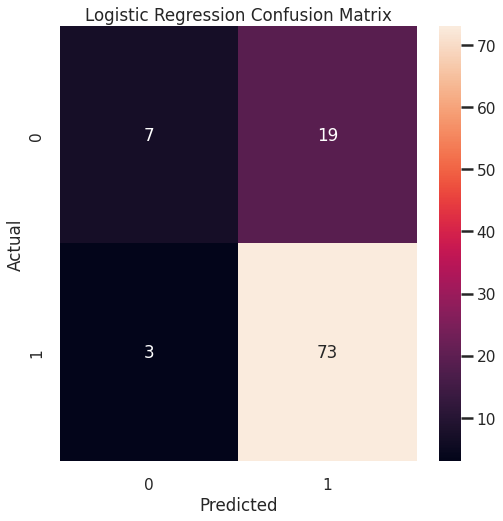

In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(x_train,y_train)
y_pred_log=log.predict(x_test)
confusion_log=confusion_matrix(y_test,log.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
     

In [29]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 6 20]
 [ 5 71]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.55      0.23      0.32        26
           1       0.78      0.93      0.85        76

    accuracy                           0.75       102
   macro avg       0.66      0.58      0.59       102
weighted avg       0.72      0.75      0.72       102


The Accuracy of Support Vector Machine is 75.49 %


              precision    recall  f1-score   support

           0       0.50      0.12      0.19        26
           1       0.76      0.96      0.85        76

    accuracy                           0.75       102
   macro avg       0.63      0.54      0.52       102
weighted avg       0.69      0.75      0.68       102



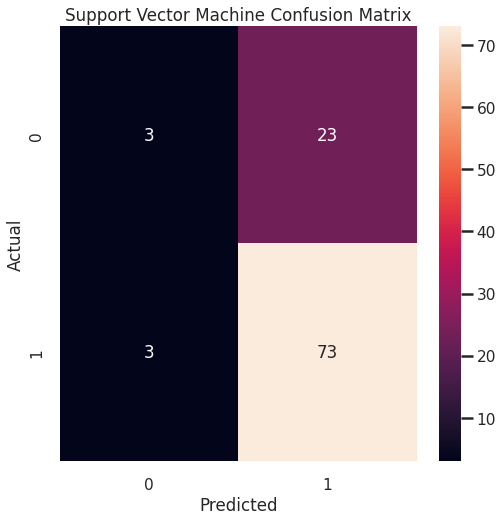

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(x_train,y_train)
y_pred_svc=rcv.predict(x_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 7 19]
 [ 4 72]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.64      0.27      0.38        26
           1       0.79      0.95      0.86        76

    accuracy                           0.77       102
   macro avg       0.71      0.61      0.62       102
weighted avg       0.75      0.77      0.74       102


The Accuracy of Random Forest Classifier is 77.45 %


              precision    recall  f1-score   support

           0       0.64      0.27      0.38        26
           1       0.79      0.95      0.86        76

    accuracy                           0.77       102
   macro avg       0.71      0.61      0.62       102
weighted avg       0.75      0.77      0.74       102



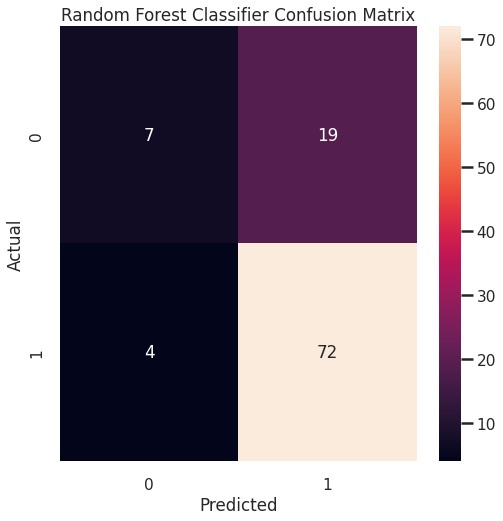

In [33]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

rgf= RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
confusion_rfg=confusion_matrix(y_test,rfg.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rfg, annot=True)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,rfg_pred))
plt.show()

In [34]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[18  8]
 [23 53]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.44      0.69      0.54        26
           1       0.87      0.70      0.77        76

    accuracy                           0.70       102
   macro avg       0.65      0.69      0.66       102
weighted avg       0.76      0.70      0.71       102


The Accuracy of K Nearest Neighbors Classifier is 69.61 %


              precision    recall  f1-score   support

           0       0.44      0.69      0.54        26
           1       0.87      0.70      0.77        76

    accuracy                           0.70       102
   macro avg       0.65      0.69      0.66       102
weighted avg       0.76      0.70      0.71       102



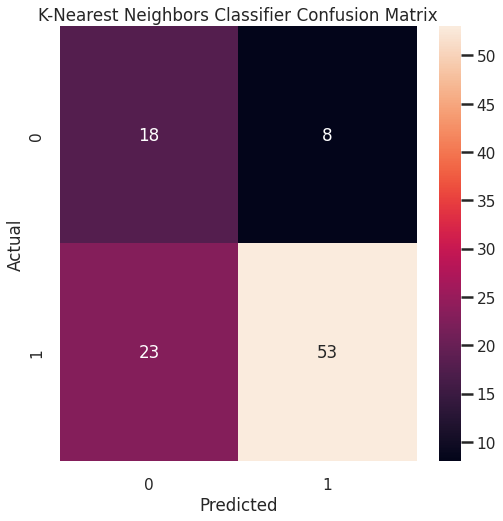

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix

confusion_knn=confusion_matrix(y_test,knn.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.title('K-Nearest Neighbors Classifier Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(x_test)))

In [36]:
from sklearn.naive_bayes import GaussianNB
nbcla = GaussianNB()
nbcla.fit(x_train, y_train)
nbcla.fit(x_train, y_train)
nbcla_pred = nbcla.predict(x_test)
nbcla_conf = confusion_matrix(y_test, nbcla_pred)
nbcla_report = classification_report(y_test,nbcla_pred)
nbcla_acc = round(accuracy_score(y_test, nbcla_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{nbcla_conf}")
print(f"\nClassification Report : \n\n{nbcla_report}")
print(f"\nThe Accuracy of Naive Bayes Classification Classifier is {nbcla_acc} %")

Confusion Matrix : 

[[ 8 18]
 [ 8 68]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        26
           1       0.79      0.89      0.84        76

    accuracy                           0.75       102
   macro avg       0.65      0.60      0.61       102
weighted avg       0.72      0.75      0.72       102


The Accuracy of Naive Bayes Classification Classifier is 74.51 %


              precision    recall  f1-score   support

           0       0.50      0.31      0.38        26
           1       0.79      0.89      0.84        76

    accuracy                           0.75       102
   macro avg       0.65      0.60      0.61       102
weighted avg       0.72      0.75      0.72       102



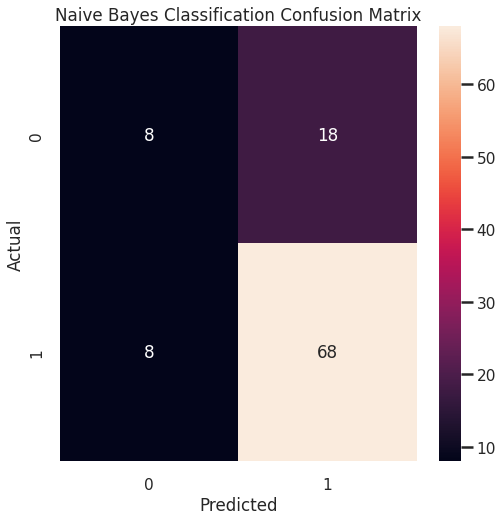

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
nbcla = GaussianNB()
nbcla.fit(x_train, y_train)
y_predict3 = nbcla.predict(x_test)

confusion_nbcla=confusion_matrix(y_test,nbcla.predict(x_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_nbcla,annot=True)
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")

from sklearn.metrics import classification_report
print(classification_report(y_test,nbcla.predict(x_test)))
